In [1]:
#importando a biblioteca Panda
import pandas as pd
import time




In [2]:
# Abrindo o 1° csv
df_1 = pd.read_csv(r'C:\Users\gabri\Proj_4_dress_sale\datasets\train_salaries.csv')
df_1

Tempo de execução: 0.58 segundos


,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163
...,...,...
999995,JOB1362685407682,88
999996,JOB1362685407683,160
999997,JOB1362685407684,64
999998,JOB1362685407685,149


In [3]:
# Abrindo o 2° csv
df_2 = pd.read_csv(r'C:\Users\gabri\Proj_4_dress_sale\datasets\train_dataset.csv')
df_2

Tempo de execução: 1.24 segundos


,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16
...,...,...,...,...,...,...,...,...
999995,JOB1362685407682,COMP56,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19,94
999996,JOB1362685407683,COMP24,CTO,HIGH_SCHOOL,NONE,FINANCE,12,35
999997,JOB1362685407684,COMP23,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16,81
999998,JOB1362685407685,COMP3,CFO,MASTERS,NONE,HEALTH,6,5


In [4]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   jobId   1000000 non-null  object
 1   salary  1000000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 15.3+ MB
Tempo de execução: 0.19 segundos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   jobId   1000000 non-null  object
 1   salary  1000000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


In [5]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB
Tempo de execução: 0.89 segundos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            10000

Os dados estão em formato correto, então o primeiro passo é unir os dois datasets

In [6]:
# Renomeando coluna job_Id para evitar ambiguidade na hora de dropar dados
df_2 = df_2.rename(columns={'jobId':'jobId2'})


Tempo de execução: 0.03 segundos


In [7]:
#juntando datasets
df = df_1.merge(df_2, left_on='jobId', right_on='jobId2')
df = df.drop('jobId2', axis=1)
print(df.head())

              jobId  salary companyId         jobType       degree      major  \
0  JOB1362684407687     130    COMP37             CFO      MASTERS       MATH   
1  JOB1362684407688     101    COMP19             CEO  HIGH_SCHOOL       NONE   
2  JOB1362684407689     137    COMP52  VICE_PRESIDENT     DOCTORAL    PHYSICS   
3  JOB1362684407690     142    COMP38         MANAGER     DOCTORAL  CHEMISTRY   
4  JOB1362684407691     163     COMP7  VICE_PRESIDENT    BACHELORS    PHYSICS   

  industry  yearsExperience  milesFromMetropolis  
0   HEALTH               10                   83  
1      WEB                3                   73  
2   HEALTH               10                   38  
3     AUTO                8                   17  
4  FINANCE                8                   16  
Tempo de execução: 1.01 segundos
              jobId  salary companyId         jobType       degree      major  \
0  JOB1362684407687     130    COMP37             CFO      MASTERS       MATH   
1  JOB136268

In [8]:
# Contagem de linhas distintas
distinct_df = df.drop_duplicates()
print("Distinct count: ", distinct_df.shape[0])
print(distinct_df.head(10))

Distinct count:  1000000
              jobId  salary companyId         jobType       degree      major  \
0  JOB1362684407687     130    COMP37             CFO      MASTERS       MATH   
1  JOB1362684407688     101    COMP19             CEO  HIGH_SCHOOL       NONE   
2  JOB1362684407689     137    COMP52  VICE_PRESIDENT     DOCTORAL    PHYSICS   
3  JOB1362684407690     142    COMP38         MANAGER     DOCTORAL  CHEMISTRY   
4  JOB1362684407691     163     COMP7  VICE_PRESIDENT    BACHELORS    PHYSICS   
5  JOB1362684407692     113    COMP15         MANAGER     DOCTORAL    COMPSCI   
6  JOB1362684407693     178    COMP15             CFO         NONE       NONE   
7  JOB1362684407694      73    COMP24          JUNIOR    BACHELORS  CHEMISTRY   
8  JOB1362684407695      31    COMP20         JANITOR  HIGH_SCHOOL       NONE   
9  JOB1362684407696     104    COMP41  VICE_PRESIDENT    BACHELORS  CHEMISTRY   

    industry  yearsExperience  milesFromMetropolis  
0     HEALTH               10 

De todos os nossos 1 milhões de registros, todos são, em algum grau, diferentes uns dos outros, ou seja, nossa tabela não possui valores duplicados.

#### Chegagem de Nulos

In [9]:
# Checagem de Nulos com a função isNull do pySpark
df.isnull().sum()


Tempo de execução: 0.73 segundos


jobId                  0
salary                 0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64

Os valores nulos estão descritos como o valor None, por isso, faremos a contagem sem comandos automáticos

In [10]:
print('Number of missing values for jobType: {}'.format(df[df['jobType'] == 'NONE'].shape[0]))
print('Number of missing values for degree: {}'.format(df[df['degree'] == 'NONE'].shape[0]))
print('Number of missing values for major: {}'.format(df[df['major'] == 'NONE'].shape[0]))
print('Number of missing values for industry: {}'.format(df[df['industry'] == 'NONE'].shape[0]))

Number of missing values for jobType: 0
Number of missing values for degree: 236854
Number of missing values for major: 532355
Number of missing values for industry: 0
Tempo de execução: 0.30 segundos
Number of missing values for jobType: 0
Number of missing values for degree: 236854
Number of missing values for major: 532355
Number of missing values for industry: 0


Esses valores não são nulos, de fato, mas acionam a falta de um ou mais atributos nos funcionários.

### EDA

In [11]:

df.describe()


Tempo de execução: 0.08 segundos


,salary,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000,1000000.000000
mean,116.061818,11.992386,49.529260
std,38.717936,7.212391,28.877733
min,0.000000,0.000000,0.000000
25%,88.000000,6.000000,25.000000
50%,114.000000,12.000000,50.000000
75%,141.000000,18.000000,75.000000
max,301.000000,24.000000,99.000000


In [12]:
print(df)

                   jobId  salary companyId         jobType       degree  \
0       JOB1362684407687     130    COMP37             CFO      MASTERS   
1       JOB1362684407688     101    COMP19             CEO  HIGH_SCHOOL   
2       JOB1362684407689     137    COMP52  VICE_PRESIDENT     DOCTORAL   
3       JOB1362684407690     142    COMP38         MANAGER     DOCTORAL   
4       JOB1362684407691     163     COMP7  VICE_PRESIDENT    BACHELORS   
...                  ...     ...       ...             ...          ...   
999995  JOB1362685407682      88    COMP56  VICE_PRESIDENT    BACHELORS   
999996  JOB1362685407683     160    COMP24             CTO  HIGH_SCHOOL   
999997  JOB1362685407684      64    COMP23          JUNIOR  HIGH_SCHOOL   
999998  JOB1362685407685     149     COMP3             CFO      MASTERS   
999999  JOB1362685407686      88    COMP59          JUNIOR    BACHELORS   

            major   industry  yearsExperience  milesFromMetropolis  
0            MATH     HEALTH  

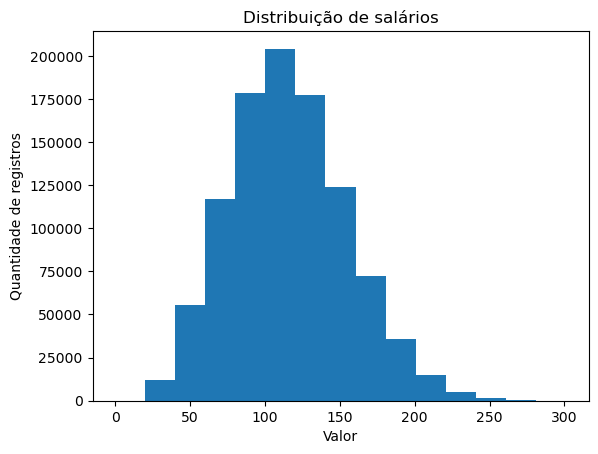

Tempo de execução: 1.00 segundos


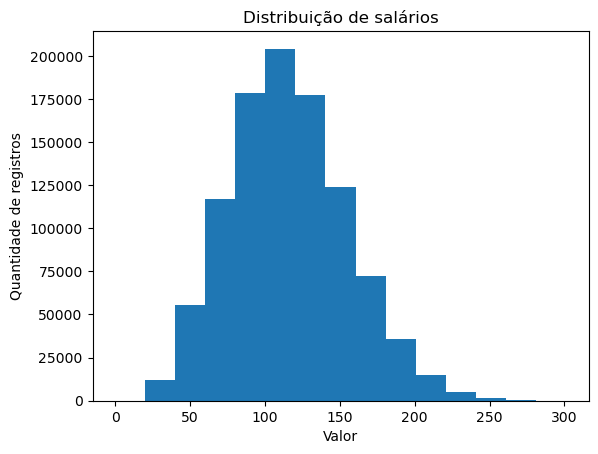

In [13]:
import matplotlib.pyplot as plt



# Plotar um histograma
plt.hist(df['salary'], bins=15)
plt.xlabel('Valor')
plt.ylabel('Quantidade de registros')
plt.title('Distribuição de salários')
plt.show()

### Análises

Diferenças salariais

In [14]:
# Criando a temp view
df = df[df.salary != 0]

Tempo de execução: 0.08 segundos


In [15]:
# Média salarial por função
df_grouped = df.groupby('jobType').mean().reset_index()
df_grouped = df_grouped.sort_values(by='salary', ascending=False)
df_grouped = df_grouped[['jobType', 'salary']]
df_grouped = df_grouped.rename(columns={'jobType': 'job', 'salary': 'average_salary'})
df_grouped

Tempo de execução: 0.09 segundos


,job,average_salary
0,CEO,145.311425
2,CTO,135.481067
1,CFO,135.458547
7,VICE_PRESIDENT,125.368630
5,MANAGER,115.368518
6,SENIOR,105.487775
4,JUNIOR,95.333087
3,JANITOR,70.813045


In [16]:
# Olhando os 10 salários mais altos

df_grouped = df.groupby("industry")["salary"].mean()
df_grouped.sort_values(ascending=False, inplace=True)
df_grouped.head(10)

Tempo de execução: 0.07 segundos


industry
OIL          130.953863
FINANCE      130.747659
WEB          121.645362
HEALTH       115.735540
AUTO         109.435222
SERVICE      104.446820
EDUCATION     99.448386
Name: salary, dtype: float64

In [20]:
# Olhando os 10 salários mais baixos
df.sort_values(by='salary', ascending=True).head(10)

Tempo de execução: 0.42 segundos


,jobId,salary,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
141942,JOB1362684549629,17,COMP27,JANITOR,NONE,NONE,EDUCATION,0,98
188931,JOB1362684596618,18,COMP26,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,96
807108,JOB1362685214795,18,COMP29,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,0,92
482429,JOB1362684890116,18,COMP46,JANITOR,NONE,NONE,EDUCATION,0,92
798142,JOB1362685205829,19,COMP38,JANITOR,NONE,NONE,EDUCATION,0,75
207218,JOB1362684614905,19,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,0,81
477468,JOB1362684885155,19,COMP52,JANITOR,NONE,NONE,EDUCATION,0,91
677635,JOB1362685085322,19,COMP61,JANITOR,NONE,NONE,EDUCATION,0,96
60556,JOB1362684468243,19,COMP23,JANITOR,NONE,NONE,EDUCATION,1,93
981967,JOB1362685389654,19,COMP28,JANITOR,NONE,NONE,EDUCATION,0,92


In [22]:
# Média salarial por industria

grouped = df.groupby('industry')['salary'].mean()
grouped = grouped.reset_index()
grouped = grouped.sort_values(by='salary', ascending=False)

print(grouped)

    industry      salary
4        OIL  130.953863
2    FINANCE  130.747659
6        WEB  121.645362
3     HEALTH  115.735540
0       AUTO  109.435222
5    SERVICE  104.446820
1  EDUCATION   99.448386
Tempo de execução: 0.07 segundos
    industry      salary
4        OIL  130.953863
2    FINANCE  130.747659
6        WEB  121.645362
3     HEALTH  115.735540
0       AUTO  109.435222
5    SERVICE  104.446820
1  EDUCATION   99.448386


In [23]:
# Média salarial por graduação

grouped_degree = df.groupby('degree').mean()
grouped_degree = grouped_degree.reset_index()
grouped_degree = grouped_degree.sort_values(by='salary', ascending=False)
print(grouped_degree[['degree', 'salary']])

        degree      salary
1     DOCTORAL  135.490979
3      MASTERS  130.505647
0    BACHELORS  125.454663
2  HIGH_SCHOOL  101.921085
4         NONE   98.176882
Tempo de execução: 0.09 segundos
        degree      salary
1     DOCTORAL  135.490979
3      MASTERS  130.505647
0    BACHELORS  125.454663
2  HIGH_SCHOOL  101.921085
4         NONE   98.176882


Análise de tempo de experiência

In [24]:
from scipy import stats
import seaborn as sns

Tempo de execução: 1.77 segundos


In [26]:
df_exp = df
df_exp = df_exp.sort_values(by='salary', ascending=False)
print(df_exp[['salary', 'jobType', 'industry', 'yearsExperience']])

job_list = ['CEO','CFO','CTO','VICE_PRESIDENT','MANAGER','SENIOR','JUNIOR','JANITOR']

        salary  jobType   industry  yearsExperience
685562     301      CTO        OIL               24
400611     301      CFO        OIL               23
572777     298      CEO        OIL               22
293221     294      CEO        OIL               19
911747     294      CEO    FINANCE               24
...        ...      ...        ...              ...
981967      19  JANITOR  EDUCATION                0
188931      18  JANITOR  EDUCATION                1
482429      18  JANITOR  EDUCATION                0
807108      18  JANITOR  EDUCATION                0
141942      17  JANITOR  EDUCATION                0

[999995 rows x 4 columns]
Tempo de execução: 0.42 segundos
        salary  jobType   industry  yearsExperience
685562     301      CTO        OIL               24
400611     301      CFO        OIL               23
572777     298      CEO        OIL               22
293221     294      CEO        OIL               19
911747     294      CEO    FINANCE               24
... 

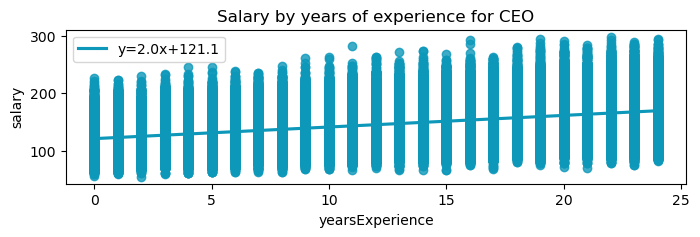

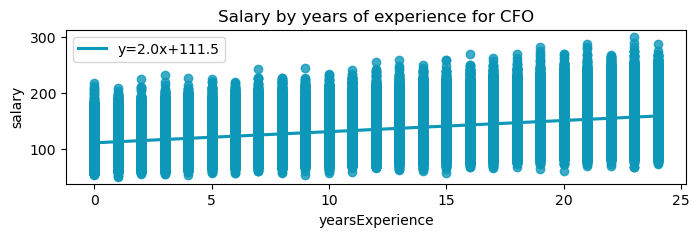

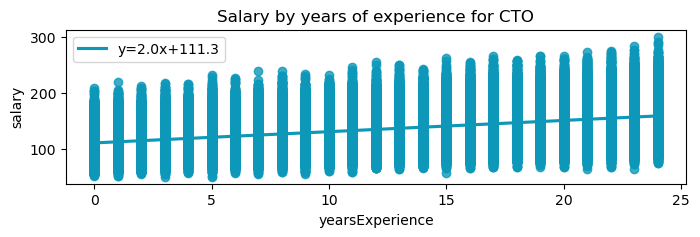

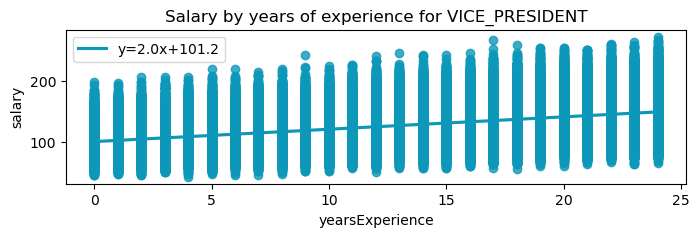

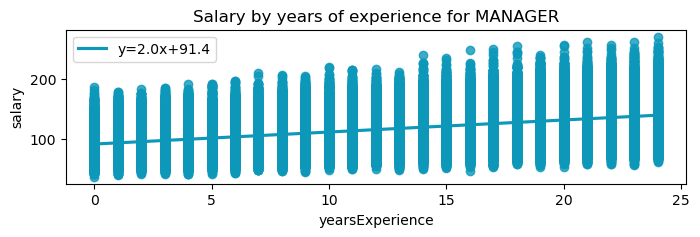

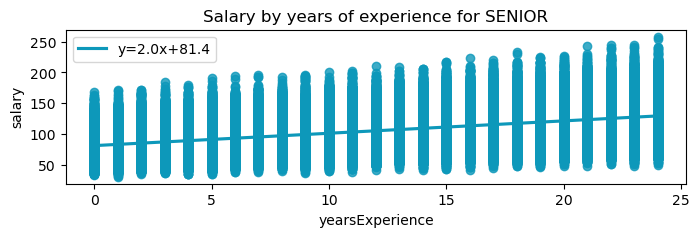

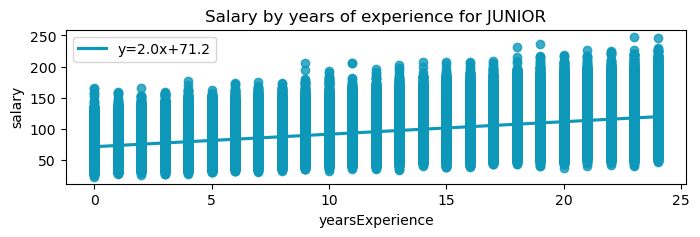

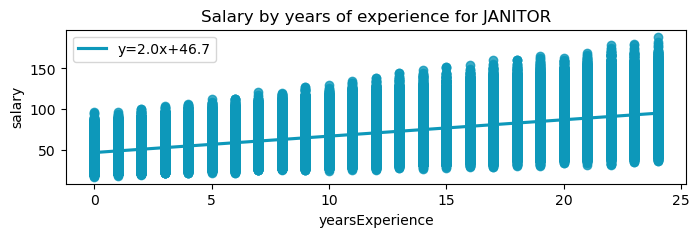

Tempo de execução: 94.18 segundos


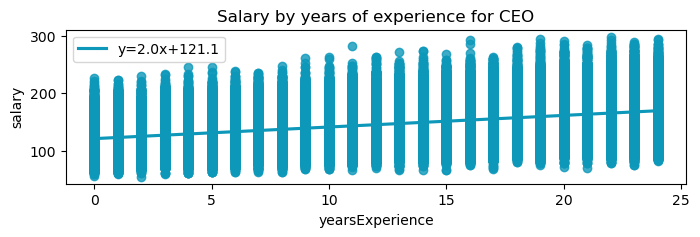

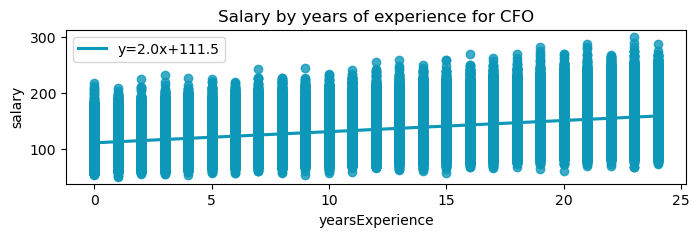

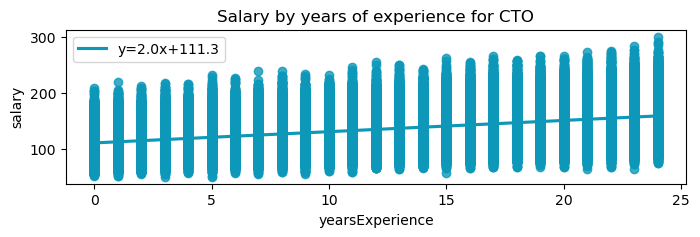

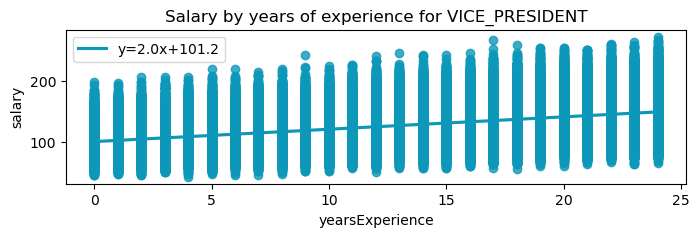

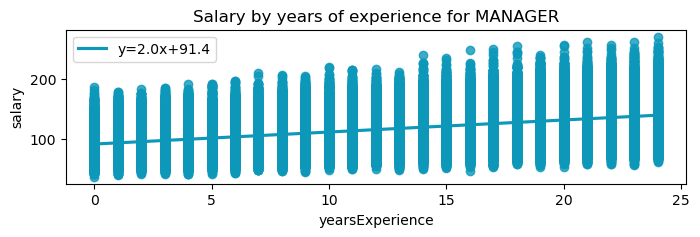

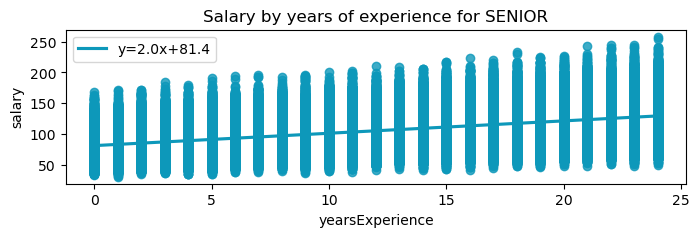

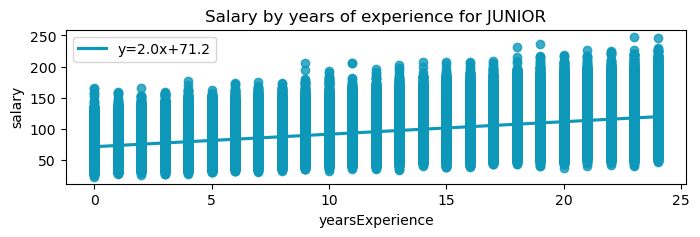

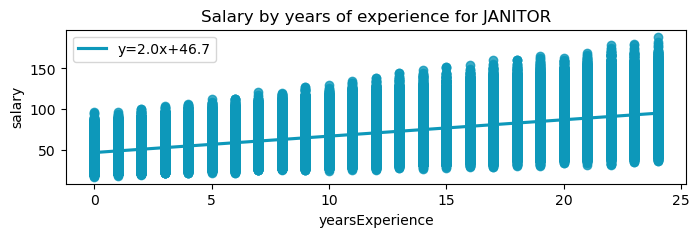

In [29]:
slope_list = []  #to save the slopes of the regression lines
intercept_list = [] #to save the intercepts of the regression lines


for job in job_list:
    df_x = df.loc[df_exp['jobType']==job]
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_x['yearsExperience'],df_x['salary'])
    slope_list.append(slope)
    intercept_list.append(intercept)
    plt.figure(figsize=(8,2))
    sns.regplot(x='yearsExperience', y = 'salary', data=df_x, color='#0d98ba', line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
    plt.legend()
    plt.title('Salary by years of experience for ' + job)
    plt.show()
    

